# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.


In [14]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.linalg import det


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [15]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    (n,d) = X_train.shape
    (m,d) = X_test.shape
    
    mean = 0.0
    
    for i in range(n):
        if Y_train[i]==1:
            mean = mean + 1.0
        else:
            pass
    
    plus = mean
    mean = mean / n
    
    a = np.zeros(d)
    b = np.zeros(d)
    
    for i in range(n):
        if Y_train[i] == 1:
            a = a + X_train[i]
                
        else:
            b = b + X_train[i]        
                    
    a = (1/plus)*a
    b = (1/(n-plus))*b
        
    val = np.log((1-mean)/mean)
    
    Y =  np.zeros(m)
    
    for i in range(m):
        p = X_test[i]-b
        q = X_test[i]-a
        w = 0
        for j in range(d):
            w = w + p[j]*p[j] - q[j]*q[j]
        w = w/2
        if w < val:
            Y[i] = -1
        else:
            Y[i] = +1
    
    return Y
    
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    (n,d) = X_train.shape
    (m,d) = X_test.shape
    
    mean = 0.0
    
    for i in range(n):
        if Y_train[i] == 1:
            mean = mean + 1.0
        else:
            pass
        
    plus = mean
    mean = mean / n
    
    a = np.zeros(d)
    b = np.zeros(d)
    
    
    for i in range(n):
        if Y_train[i] == 1:
            for j in range(d):
                a[j] = a[j] + X_train[i][j]
                
        else:
            for j in range(d):
                b[j] = b[j] + X_train[i][j]
                    
    a = (1/plus)*a
    b = (1/(n-plus))*b
    
    val = np.log((1-mean)/mean)
    sig = np.zeros((d,d))
    
    for i in range(n):
        p = X_train[i]-a
        p = p[np.newaxis]
        q = p.transpose()
        sig = sig + np.matmul(q,p)
        
    
    sig = (1/(plus-1))*sig
    sig = inv(sig)
    
    Y = np.zeros(m)
    
    for i in range(m):
        p = X_test[i] - a
        p = p[np.newaxis]
        mul = np.matmul(p,sig)
        mul = np.matmul(mul,p.transpose())
        
        q = X_test[i] - b
        q = q[np.newaxis]
        mul1 = np.matmul(q,sig)
        mul1 = np.matmul(mul1,q.transpose())
        
        mul2 = mul1-mul
        mul2 = (1/2)*mul2
        
        if mul2[0][0] < val:
            Y[i] = -1
        else:
            Y[i] = 1
            
    return Y 
    

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    
    (n,d) = X_train.shape
    (m,d) = X_test.shape
    
    mean = 0.0
    
    for i in range(n):
        if Y_train[i] == 1:
            mean = mean + 1.0
        else:
            pass
    
    plus = mean
    mean = mean / n
    
    a = np.zeros(d)
    b = np.zeros(d)
    
    for i in range(n):
        if Y_train[i] == 1:
            for j in range(d):
                a[j] = a[j] + X_train[i][j]
        else:
            for j in range(d):
                b[j] = b[j] + X_train[i][j]
                    
    a = (1/plus)*a
    b = (1/(n-plus))*b
    
    sig1 = np.zeros((d,d))
    sig2 = np.zeros((d,d))

    
    for i in range(n):
        if Y_train[i]==1:
            p = X_train[i]-a
            p = p[np.newaxis]
            q = p.transpose()
            sig1 = sig1 + np.matmul(q,p)
        else:
            p = X_train[i]-b
            p = p[np.newaxis]
            q = p.transpose()
            sig2 = sig2 + np.matmul(q,p)
        
    
    sig1 = (1/(plus-1))*sig1
    
    sig2 = (1/(n-plus-1))*sig2
    
    det1 = np.linalg.det(sig1)
    det2 = np.linalg.det(sig2)
    val = np.log(((1-mean)*(np.sqrt(det1)))/(mean*(np.sqrt(det2))))
    
    sig1 = inv(sig1)    
    sig2 = inv(sig2)
    
    Y = np.zeros(m)
    
    for i in range(m):
        p = X_test[i] - a
        p = p[np.newaxis]
        mul = np.matmul(p,sig1)
        mul = np.matmul(mul,p.transpose())
        
        q = X_test[i] - b
        q = q[np.newaxis]
        mul1 = np.matmul(q,sig2)
        mul1 = np.matmul(mul1,q.transpose())
        
        mul2 = mul1-mul
        
        mul2 = (1/2)*mul2
        
        if mul2[0][0] < val:
            Y[i] = -1
        else:
            Y[i] = 1
            
    return Y 

    
    




In [16]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 

# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))


Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
print(Y_pred_test_1a)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
print(Y_pred_test_1b)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)
print(Y_pred_test_1c)




[ 1.  1.  1. ... -1. -1.  1.]
[ 1.  1.  1. ... -1. -1.  1.]
[ 1.  1.  1. ... -1. -1.  1.]


**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.


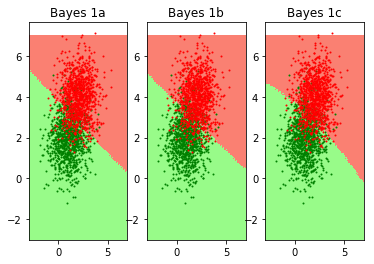

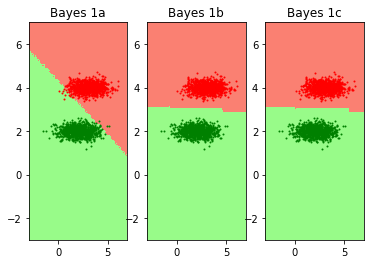

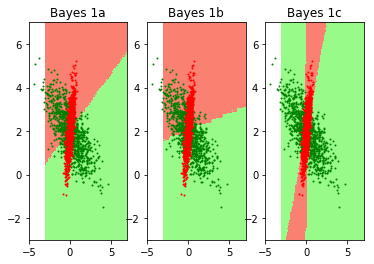

In [17]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

import numpy as np
    


"""print(X_train.shape)
Y_pred = Bayes1b(X_train, Y_train, X_test)
print(Y_pred)
print(Y_test)

m, d = X_test.shape
count = 0
for i in range(0,m):
    if Y_pred[i] != Y_test[i]:
        count += 1
        print(count)"""

def plot(X_train,Y_train):        
    fig = plt.figure()
    sp1 = fig.add_subplot(1,3,1)
    sp2 = fig.add_subplot(1,3,2)
    sp3 = fig.add_subplot(1,3,3)
    sp1.set_title('Bayes 1a')
    sp2.set_title('Bayes 1b')
    sp3.set_title('Bayes 1c')
    X,Y = np.meshgrid(np.linspace(-3,7,100), np.linspace(-3,7,100))
    z = np.c_[X.ravel(), Y.ravel()]
    Z = np.reshape(Bayes1a(X_train, Y_train, z), np.shape(X))
    sp1.contourf(X,Y,Z,colors = ["#fa8072", "#98fb89"])
    sp1.scatter(X_train[Y_train == 1][:,0], X_train[Y_train == 1][:,1],color = 'green',s=1)
    sp1.scatter(X_train[Y_train == -1][:,0], X_train[Y_train == -1][:,1],color = 'red',s=1)
    X,Y = np.meshgrid(np.linspace(-3,7,100), np.linspace(-3,7,100))
    z = np.c_[X.ravel(), Y.ravel()]
    Z = np.reshape(Bayes1b(X_train, Y_train, z), np.shape(X))
    sp2.contourf(X,Y,Z,colors = ["#fa8072", "#98fb89"])
    sp2.scatter(X_train[Y_train == 1][:,0], X_train[Y_train == 1][:,1],color = 'green',s=1)
    sp2.scatter(X_train[Y_train == -1][:,0], X_train[Y_train == -1][:,1],color = 'red',s=1)
    X,Y = np.meshgrid(np.linspace(-3,7,100), np.linspace(-3,7,100))
    z = np.c_[X.ravel(), Y.ravel()]
    Z = np.reshape(Bayes1c(X_train, Y_train, z), np.shape(X))
    sp3.contourf(X,Y,Z,colors = ["#fa8072", "#98fb89"])
    sp3.scatter(X_train[Y_train == 1][:,0], X_train[Y_train == 1][:,1],color = 'green',s=1)
    sp3.scatter(X_train[Y_train == -1][:,0], X_train[Y_train == -1][:,1],color = 'red',s=1)
    plt.show()

for i in range(1,4):
    X_train = np.load("./Archive/dataset1_"+str(i)+"/arr_0.npy")
    Y_train = np.load("./Archive/dataset1_"+str(i)+"/arr_1.npy")
    X_test  = np.load("./Archive/dataset1_"+str(i)+"/arr_2.npy")
    Y_test  = np.load("./Archive/dataset1_"+str(i)+"/arr_3.npy")
    plot(X_train,Y_train)    


** Cell type : TextWrite ** 
(Write your observations and table of errors here)

            Bayes1a        Bayes1b      Bayes1c
    data
        1     252           248          245
        2     17            0            0
        3     994           984          270


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [18]:
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    (n,d) = X_train.shape
    (m,d) = X_test.shape
    
    m1 = np.zeros(d)
    m2 = np.zeros(d)
    m3 = np.zeros(d)
    m4 = np.zeros(d)
    a1 = 0
    a2 = 0
    a3 = 0
    a4 = 0
    
    for i in range(n):
        if Y_train[i] == 1:
            m1 = m1 + X_train[i]
            a1 = a1 + 1
        elif Y_train[i] == 2:
            m2 = m2 +X_train[i]
            a2= a2 + 1
        elif Y_train[i] == 3:
            m3 = m3 +X_train[i]
            a3 = a3+ 1
        else:
            m4 = m4 +X_train[i]
            a4 = a4 + 1
            
    m1 = (1/a1)*m1
    m2 = (1/a2)*m2
    m3 = (1/a3)*m3
    m4 = (1/a4)*m4
    
    a1 = a1/n
    a2 = a2/n
    a3 = a3/n
    a4 = a4/n
    
    
    Y = np.zeros(m)
    
    sig = np.zeros((d,d))
    
    for i in range(n):
        if Y_train[i]==1:
            p = X_train[i]-m1
            p = p[np.newaxis]
            q = p.transpose()
            sig = sig + np.matmul(q,p)
        
    
    sig = (1/((a1*n)-1))*sig
    
    sig  = inv(sig)
    
    for i in range(m):
        p = X_test[i] - m1
        p = p[np.newaxis]
        mul = np.matmul(p,sig)
        mul = np.matmul(mul,p.transpose())
        k1 = mul[0][0]
        
        k1 = (-1)*(1/2)*k1
        k1 = np.exp(k1)
        k1 = a1*k1
        
        p = X_test[i] - m2
        p = p[np.newaxis]
        mul = np.matmul(p,sig)
        mul = np.matmul(mul,p.transpose())
        
        k2 = mul[0][0]
        
        k2 = (-1)*(1/2)*k2
        k2 = np.exp(k2)
        k2 = a2*k2
        
        p = X_test[i] - m3
        p = p[np.newaxis]
        mul = np.matmul(p,sig)
        mul = np.matmul(mul,p.transpose())
        
        k3 = mul[0][0]
        
        k3 = (-1)*(1/2)*k3
        k3 = np.exp(k3)
        k3 = a3*k3
        
        p = X_test[i] - m4
        p = p[np.newaxis]
        mul = np.matmul(p,sig)
        mul = np.matmul(mul,p.transpose())
        
        k4 = mul[0][0]
        
        k4 = (-1)*(1/2)*k4
        k4 = np.exp(k4)
        k4 = a4*k4
        
        n1 = k1/(k1+k2+k3+k4)
        n2 = k2/(k1+k2+k3+k4)
        n3 = k3/(k1+k2+k3+k4)
        n4 = k4/(k1+k2+k3+k4)
        
        l = np.matrix('0 1 2 3 ; 1 0 1 2 ; 2 1 0 1 ; 3 2 1 0')
        
        ita = np.matrix([n1,n2,n3,n4])
        
        ita = np.matmul(ita,l)
        
        Y[i] = np.argmin(ita)+1
    
        
    return Y
        
    
def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    (n,d) = X_train.shape
    (m,d) = X_test.shape
    
    m1 = np.zeros(d)
    m2 = np.zeros(d)
    m3 = np.zeros(d)
    m4 = np.zeros(d)
    a1 = 0
    a2 = 0
    a3 = 0
    a4 = 0
    
    for i in range(n):
        if Y_train[i] == 1:
            m1 = m1 + X_train[i]
            a1 = a1 + 1
        elif Y_train[i] == 2:
            m2 = m2 +X_train[i]
            a2= a2 + 1
        elif Y_train[i] == 3:
            m3 = m3 +X_train[i]
            a3 = a3+ 1
        else:
            m4 = m4 +X_train[i]
            a4 = a4 + 1
            
    m1 = (1/a1)*m1
    m2 = (1/a2)*m2
    m3 = (1/a3)*m3
    m4 = (1/a4)*m4
    
    a1 = a1/n
    a2 = a2/n
    a3 = a3/n
    a4 = a4/n
    
    
    
    
    Y = np.zeros(m)
    
    for i in range(m):
        k1 = 0
        for j in range(d):
            k1 = k1 + (X_test[i][j]-m1[j])*(X_test[i][j]-m1[j])
        
        k1 = (-1)*(1/2)*k1
        k1 = np.exp(k1)
        k1 = a1*k1
        
        k2 = 0
        for j in range(d):
            k2 = k2 + (X_test[i][j]-m2[j])*(X_test[i][j]-m2[j])
        
        k2 = (-1)*(1/2)*k2
        k2 = np.exp(k2)
        k2 = a2*k2
        
        k3 = 0
        for j in range(d):
            k3 = k3 + (X_test[i][j]-m3[j])*(X_test[i][j]-m3[j])
        
        k3 = (-1)*(1/2)*k3
        k3 = np.exp(k3)
        k3 = a3*k3
        
        k4 = 0
        for j in range(d):
            k4 = k4 + (X_test[i][j]-m4[j])*(X_test[i][j]-m4[j])
        
        k4 = (-1)*(1/2)*k4
        k4 = np.exp(k4)
        k4 = a4*k4
        
        n1 = k1/(k1+k2+k3+k4)
        n2 = k2/(k1+k2+k3+k4)
        n3 = k3/(k1+k2+k3+k4)
        n4 = k4/(k1+k2+k3+k4)
        
        l = np.matrix('0 1 2 3 ; 1 0 1 2 ; 2 1 0 1 ; 3 2 1 0')
        
        ita = np.matrix([n1,n2,n3,n4])
        
        ita = np.matmul(ita,l)
        
        Y[i] = np.argmin(ita)+1
    
        
    return Y

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    
    (n,d) = X_train.shape
    (m,d) = X_test.shape
    
    m1 = np.zeros(d)
    m2 = np.zeros(d)
    m3 = np.zeros(d)
    m4 = np.zeros(d)
    a1 = 0
    a2 = 0
    a3 = 0
    a4 = 0
    
    for i in range(n):
        if Y_train[i] == 1:
            m1 = m1 + X_train[i]
            a1 = a1 + 1
        elif Y_train[i] == 2:
            m2 = m2 +X_train[i]
            a2= a2 + 1
        elif Y_train[i] == 3:
            m3 = m3 +X_train[i]
            a3 = a3+ 1
        else:
            m4 = m4 +X_train[i]
            a4 = a4 + 1
            
    m1 = (1/a1)*m1
    m2 = (1/a2)*m2
    m3 = (1/a3)*m3
    m4 = (1/a4)*m4
    
    a1 = a1/n
    a2 = a2/n
    a3 = a3/n
    a4 = a4/n
    
    
    Y = np.zeros(m)
    
    sig1 = np.zeros((d,d))
    sig2 = np.zeros((d,d))
    sig3 = np.zeros((d,d))
    sig4 = np.zeros((d,d))
    
    for i in range(n):
        if Y_train[i]==1:
            p = X_train[i]-m1
            p = p[np.newaxis]
            q = p.transpose()
            sig1 = sig1 + np.matmul(q,p)
        
    
    sig1 = (1/((a1*n)-1))*sig1
    
    sig1  = inv(sig1)
    
    for i in range(n):
        if Y_train[i]==2:
            p = X_train[i]-m2
            p = p[np.newaxis]
            q = p.transpose()
            sig2 = sig2 + np.matmul(q,p)

    
    sig2 = (1/((a2*n)-1))*sig2
    
    sig2  = inv(sig2)
    
    for i in range(n):
        if Y_train[i]==3:
            p = X_train[i]-m3
            p = p[np.newaxis]
            q = p.transpose()
            sig3 = sig3 + np.matmul(q,p)

    
    sig3 = (1/((a3*n)-1))*sig3
    
    sig3  = inv(sig3)
    
    for i in range(n):
        if Y_train[i]==4:
            p = X_train[i]-m4
            p = p[np.newaxis]
            q = p.transpose()
            sig4 = sig4 + np.matmul(q,p)

    
    sig4 = (1/((a1*n)-1))*sig4
    
    sig4  = inv(sig4)
    
    for i in range(m):
        p = X_test[i] - m1
        p = p[np.newaxis]
        mul = np.matmul(p,sig1)
        mul = np.matmul(mul,p.transpose())
        k1 = mul[0][0]
        k1 = (-1)*(1/2)*k1
        k1 = np.exp(k1) 
        k1 = a1*k1
        det = np.linalg.det(sig1)
        det = np.sqrt(det)
        k1 = k1*det
        
        p = X_test[i] - m2
        p = p[np.newaxis]
        mul = np.matmul(p,sig2)
        mul = np.matmul(mul,p.transpose())
        
        k2 = mul[0][0]
        
        k2 = (-1)*(1/2)*k2
        k2 = np.exp(k2)
        k2 = a2*k2
        det = np.linalg.det(sig2)
        det = np.sqrt(det)
        k2 = k2*det
        
        p = X_test[i] - m3
        p = p[np.newaxis]
        mul = np.matmul(p,sig3)
        mul = np.matmul(mul,p.transpose())
        
        k3 = mul[0][0]
        
        k3 = (-1)*(1/2)*k3
        k3 = np.exp(k3)
        k3 = a3*k3
        det = np.linalg.det(sig3)
        det = np.sqrt(det)
        k3 = k3*det
        
        
        p = X_test[i] - m4
        p = p[np.newaxis]
        mul = np.matmul(p,sig4)
        mul = np.matmul(mul,p.transpose())
        
        k4 = mul[0][0]
        
        k4 = (-1)*(1/2)*k4
        k4 = np.exp(k4)
        k4 = a4*k4
        det = np.linalg.det(sig4)
        det = np.sqrt(det)
        k4 = k4*det
        
        
        n1 = k1/(k1+k2+k3+k4)
        n2 = k2/(k1+k2+k3+k4)
        n3 = k3/(k1+k2+k3+k4)
        n4 = k4/(k1+k2+k3+k4)
        
        l = np.matrix('0 1 2 3 ; 1 0 1 2 ; 2 1 0 1 ; 3 2 1 0')
        
        ita = np.matrix([n1,n2,n3,n4])
        
        ita = np.matmul(ita,l)
        
        Y[i] = np.argmin(ita)+1
        
    
        
    return Y


In [19]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
print(Y_pred_test_2a)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
print(Y_pred_test_2b)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)
print(Y_pred_test_2c)



[3. 1. 1. ... 2. 4. 2.]
[3. 1. 1. ... 2. 4. 2.]
[3. 1. 1. ... 3. 4. 2.]


**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


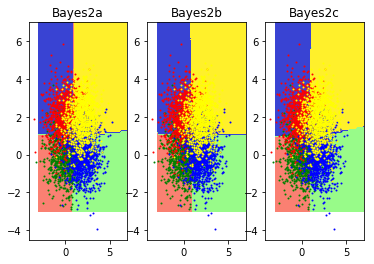

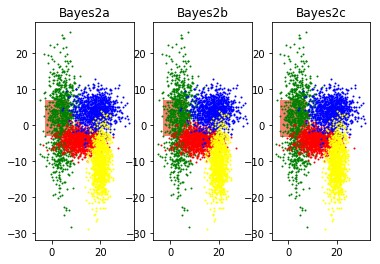

In [21]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)


"""print(X_train.shape)
Y_pred = Bayes2c(X_train, Y_train, X_test)
print(Y_pred)
print(Y_test)

m, d = X_test.shape
count = 0
for i in range(0,m):
    if Y_pred[i] != Y_test[i]:
        count += 1

print(count)"""

def plot(X_train,Y_train):        
    fig = plt.figure()
    sp1 = fig.add_subplot(1,3,1)
    sp2 = fig.add_subplot(1,3,2)
    sp3 = fig.add_subplot(1,3,3)
    sp1.set_title('Bayes2a')
    sp2.set_title('Bayes2b')
    sp3.set_title('Bayes2c')
    X,Y = np.meshgrid(np.linspace(-3,7,100), np.linspace(-3,7,100))
    z = np.c_[X.ravel(), Y.ravel()]
    Z = np.reshape(Bayes2a(X_train, Y_train, z), np.shape(X))
    sp1.contourf(X,Y,Z,colors = ["#fa8072", "#98fb89","#3943d3","#fff02b"])
    sp1.scatter(X_train[Y_train == 1][:,0], X_train[Y_train == 1][:,1],color = 'green',s=1)
    sp1.scatter(X_train[Y_train == 2][:,0], X_train[Y_train == 2][:,1],color = 'red',s=1)
    sp1.scatter(X_train[Y_train == 3][:,0], X_train[Y_train == 3][:,1],color = 'blue',s=1)
    sp1.scatter(X_train[Y_train == 4][:,0], X_train[Y_train == 4][:,1],color = 'yellow',s=1)
    X,Y = np.meshgrid(np.linspace(-3,7,100), np.linspace(-3,7,100))
    z = np.c_[X.ravel(), Y.ravel()]
    Z = np.reshape(Bayes2b(X_train, Y_train, z), np.shape(X))
    sp2.contourf(X,Y,Z,colors = ["#fa8072", "#98fb89","#3943d3","#fff02b"])
    sp2.scatter(X_train[Y_train == 1][:,0], X_train[Y_train == 1][:,1],color = 'green',s=1)
    sp2.scatter(X_train[Y_train == 2][:,0], X_train[Y_train == 2][:,1],color = 'red',s=1)
    sp2.scatter(X_train[Y_train == 3][:,0], X_train[Y_train == 3][:,1],color = 'blue',s=1)
    sp2.scatter(X_train[Y_train == 4][:,0], X_train[Y_train == 4][:,1],color = 'yellow',s=1)
    X,Y = np.meshgrid(np.linspace(-3,7,100), np.linspace(-3,7,100))
    z = np.c_[X.ravel(), Y.ravel()]
    Z = np.reshape(Bayes2c(X_train, Y_train, z), np.shape(X))
    sp3.contourf(X,Y,Z,colors = ["#fa8072", "#98fb89","#3943d3","#fff02b"])
    sp3.scatter(X_train[Y_train == 1][:,0], X_train[Y_train == 1][:,1],color = 'green',s=1)
    sp3.scatter(X_train[Y_train == 2][:,0], X_train[Y_train == 2][:,1],color = 'red',s=1)
    sp3.scatter(X_train[Y_train == 3][:,0], X_train[Y_train == 3][:,1],color = 'blue',s=1)
    sp3.scatter(X_train[Y_train == 4][:,0], X_train[Y_train == 4][:,1],color = 'yellow',s=1)
    plt.show()

for i in range(1,3):
    X_train = np.load("./Archive/dataset2_"+str(i)+"/arr_0.npy")
    Y_train = np.load("./Archive/dataset2_"+str(i)+"/arr_1.npy")
    X_test  = np.load("./Archive/dataset2_"+str(i)+"/arr_2.npy")
    Y_test  = np.load("./Archive/dataset2_"+str(i)+"/arr_3.npy")
    plot(X_train,Y_train)




** Cell type : TextWrite ** 
(Write your observations and table of errors here)



**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{m} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Repeat for 100 times, and estimate the bias and variance for all 30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms (corresponding to 5 degrees and 6 lambda values) analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. 

3b) In the next text cell, give the Bias and Variance computed as a $5\times 6$ matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




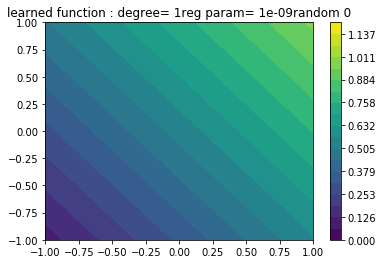

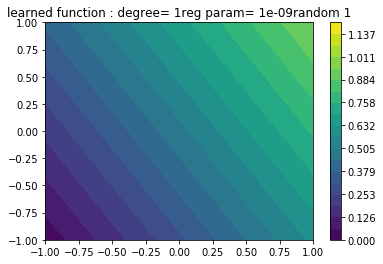

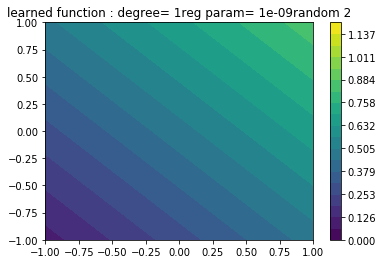

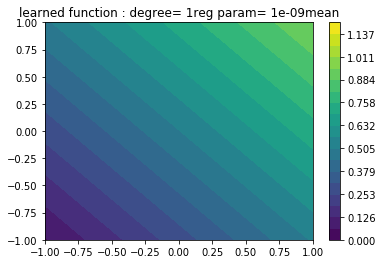

KeyboardInterrupt: 

In [22]:
# Cell type : CodeWrite

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    (n,d) = X_test.shape
    
    d1 = int(((degree+2)*(degree+1))/2)
    
    p = np.zeros((n,d1))
    
    
    for k in range(n):
        v = 0
        for i in range(degree+1):
            for j in range(i+1):
                a = X_test[k][0]
                b = X_test[k][1]
                p[k][v] =(a**j)*(b**(i-j)) 
                v = v + 1
    
    
    Y = np.matmul(p,wt_vector)
    return Y
    
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    X1 = np.reshape(X,(10000,))
    Y1 = np.reshape(Y,(10000,))
    X_data = np.transpose((X1,Y1))
    Z = polynomial_regression_ridge_pred(X_data,wt_vector,degree).reshape(X.shape)
    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20))
    plt.title('learned function : degree= '+ str(degree) + 'reg param= '+str(reg_param)+ title)
    plt.colorbar()
    plt.show()
    
    
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    
    (n,d) = X_train.shape
    
    d1 = int(((degree+2)*(degree+1))/2)
    
    p = np.zeros((n,d1))
    
    for k in range(n):
        v = 0
        for i in range(degree+1):
            for j in range(i+1):
                a = X_train[k][0]
                b = X_train[k][1]
                p[k][v] = (a**j)*(b**(i-j))
                v = v + 1
    
    pt = p.transpose()
    
    w = np.matmul(pt,p)
    
    i = np.identity(d1)
    i = (n*reg_param*(1/2))*i
    
    w = w + i
    
    w = inv(w)
    
    w = np.matmul(w,pt)
    
    w = np.matmul(w,Y_train)
    
    return w
    
    
    
def generate(s):
    X = np.zeros((s,2))
    Y = np.zeros((s,1))
    X = np.random.uniform(-1,1,(s,2))
    a = np.matrix([0.5,0.5])
    b = np.matrix([-0.5,0.5])
    c = np.matrix([0.5,-0.5])
    for i in range(s):
        q = X[i]-a
        q = np.matmul(q,q.transpose())
        q = q[0][0]
        p = X[i]-b
        p = np.matmul(p,p.transpose())
        p = p[0][0]
        w = X[i]-c
        w = np.matmul(w,w.transpose())
        w = w[0][0]
        Y[i] = np.exp((-4)*q)+np.exp((-4)*p)+np.exp((-4)*w)
        
    return X,Y
        
    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    
    d1 = int((degree+2)*(degree+1)/2)
    w = np.zeros((100,d1))
    wm = np.zeros((d1,1))
    for i in range(100):
        X_train, Y_train = generate(50)
        w1 = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)
        wm = wm + w1
        if i<3:
            visualise_polynomial_2d(w1,degree,"random "+str(i))
        w[i] = w1.reshape(1,d1)[0]
        
    
    wm = (1/100)*wm
    visualise_polynomial_2d(wm,degree,"mean")
    #print(wm.shape)
    
    #X_test,Y_test = generate(10000)
    a,b = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    X_test = np.zeros((2,10000))
    X_test[0] = a.reshape((10000,))
    X_test[1] = b.reshape((10000,))
    X_test = X_test.transpose()
    Y_test = np.zeros((10000,1))
    
    
    a = np.matrix([0.5,0.5])
    b = np.matrix([-0.5,0.5])
    c = np.matrix([0.5,-0.5])
    for i in range(num_training_samples):
        q = X_test[i]-a
        q = np.matmul(q,q.transpose())
        q = q[0][0]
        p = X_test[i]-b
        p = np.matmul(p,p.transpose())
        p = p[0][0]
        wr = X_test[i]-c
        wr = np.matmul(wr,wr.transpose())
        wr = wr[0][0]
        Y_test[i] = np.exp((-4)*q)+np.exp((-4)*p)+np.exp((-4)*wr)
    
    phi = polynomial_regression_ridge_pred(X_test, wm , degree)
    bias = 0
    bias = np.matmul((phi-Y_test).transpose(),(phi-Y_test))
    bias = bias[0][0]
    bias = bias / 10000
    #print(bias)
    
    var = np.zeros((1,1))
    
    for i in range(100):
        phi1 = polynomial_regression_ridge_pred(X_test, w[i].reshape(d1,1), degree)
        var = var + np.dot((phi1-phi).transpose(),(phi1-phi))
        
    #print(var.shape)
    var = var[0][0] / 1000000

    return bias, var , var+bias
    
    


for degree in [1,2,4,8,16]:
    for reg_param in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
        plt.figure()
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))
        

In [ ]:
# Cell type: convenience



** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.



** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using three different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{m} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter. 

In the next codewrite cell, for each training set size compute how the train and test squared error varies with degree (by changing $\phi$) and regularisation parameter (changing $\lambda$). Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title including the hyperparameters. Total number of figures = 4 (one for each training set size.)

Summarise your findings in the next tex cell in a few sentences. And reproduce the tables showing train and test error for various training sizes, with appropriate row and column names.




Minimum for: 50    data points degree: 2      reg_param: 0.1


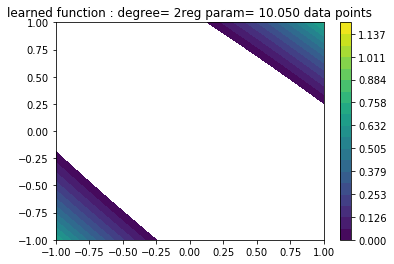

Minimum for: 100    data points degree: 2      reg_param: 0.1


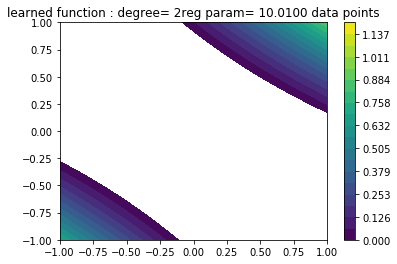

Minimum for: 200    data points degree: 16      reg_param: 1e-09


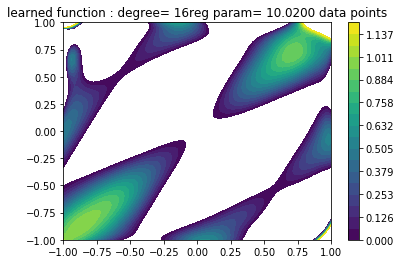

Minimum for: 1000    data points degree: 16      reg_param: 1e-09


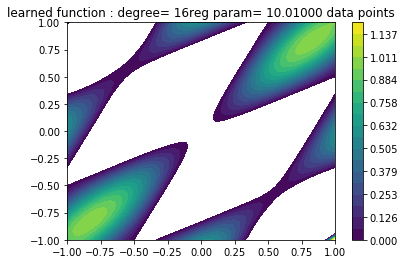

In [23]:
# Cell type : CodeWrite 
def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    (n,d) = X_test.shape
    
    d1 = int(((degree+2)*(degree+1))/2)
    
    p = np.zeros((n,d1))
    
    
    for k in range(n):
        v = 0
        for i in range(degree+1):
            for j in range(i+1):
                a = X_test[k][0]
                b = X_test[k][1]
                p[k][v] =(a**j)*(b**(i-j)) 
                v = v + 1
    
    #print(p.shape,wt_vector.shape)
    Y = np.matmul(p,wt_vector)
    return Y
    
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    X1 = np.reshape(X,(10000,))
    Y1 = np.reshape(Y,(10000,))
    X_data = np.transpose((X1,Y1))
    Z = polynomial_regression_ridge_pred(X_data,wt_vector,degree).reshape(X.shape)
    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20))
    plt.title('learned function : degree= '+ str(degree) + 'reg param= '+str(reg_param)+ title)
    plt.colorbar()
    plt.show()
    
    
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    
    (n,d) = X_train.shape
    
    d1 = int(((degree+2)*(degree+1))/2)
    
    p = np.zeros((n,d1))
    
    for k in range(n):
        v = 0
        for i in range(degree+1):
            for j in range(i+1):
                a = X_train[k][0]
                b = X_train[k][1]
                p[k][v] = (a**j)*(b**(i-j))
                v = v + 1
    
    pt = p.transpose()
    
    w = np.matmul(pt,p)
    
    i = np.identity(d1)
    i = (n*reg_param*(1/2))*i
    
    w = w + i
    
    w = inv(w)
    
    w = np.matmul(w,pt)
    
    w = np.matmul(w,Y_train)
    
    return w
    
def tse(X_train,Y_train,X_test,Y_test,degree,reg_param,data):
    w = polynomial_regression_ridge_train(X_train,Y_train,degree,reg_param)
    p = polynomial_regression_ridge_pred(X_test,w,degree)
    
    m, d = X_test.shape
    val = p-Y_test
    val = val.reshape(m,1)
    val = np.matmul(val.transpose(),val)
    val = val[0][0]
    val = val/data
    return val, w
    
error = dict()
for k in [50,100,200,1000]:
    X_train = np.load("./Archive/dataset4_1/arr_0.npy")
    X_train = X_train[0:k,:]
    Y_train = np.load("./Archive/dataset4_1/arr_1.npy")
    Y_train = Y_train[0:k]
    X_test = np.load("./Archive/dataset4_1/arr_2.npy")
    X_test = X_test[0:k,:]
    Y_test = np.load("./Archive/dataset4_1/arr_3.npy")
    Y_test = Y_test[0:k]
    min_error = 50000
    for degree in [1,2,4,8,16]:
        for reg_param in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
            val , w = tse(X_train,Y_train,X_test,Y_test,degree,reg_param,k)
            if val < min_error:
                error[k] = [w,degree,reg_param]
                min_error = val
    #print(error[k][0].shape)
    w = error[k][0]
    d = error[k][1]
    print("Minimum for: "+str(k)+"    data points "+"degree: "+str(error[k][1])+"      reg_param: "+str(error[k][2]))
    visualise_polynomial_2d(w,d,str(k)+" data points")
            



** Cell type : TextWrite **